In [2]:
json_spec = dict(file_url='https://drive.google.com/uc?id=16N0RV4fHI6joBuKbQAoG34V_cQk7vxSA', file_path='ffhq-dataset-v2.json', file_size=267793842, file_md5='425ae20f06a4da1d4dc0f46d40ba5fd6')
from collections import OrderedDict, defaultdict
import json, os
with open(os.path.join('/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d',json_spec['file_path']), 'rb') as f:
    json_data = json.load(f, object_pairs_hook=OrderedDict)

In [15]:
import random
import numpy as np
key = random.choice(list(json_data.keys()))

lm = np.array(json_data[key]['in_the_wild']['face_landmarks'])


array([1970., 1994., 2030., 2058., 2126., 2230., 2358., 2494., 2642.,
       2794., 2914., 3034., 3142., 3214., 3246., 3286., 3310., 2074.,
       2158., 2290., 2418., 2542., 2730., 2850., 2986., 3118., 3210.,
       2634., 2638., 2642., 2650., 2474., 2562., 2650., 2738., 2822.,
       2202., 2282., 2370., 2454., 2366., 2274., 2830., 2906., 2998.,
       3082., 3006., 2914., 2338., 2446., 2562., 2654., 2738., 2854.,
       2962., 2854., 2742., 2650., 2554., 2442., 2378., 2562., 2654.,
       2738., 2926., 2738., 2650., 2558.])

In [26]:
lm_chin          = lm[0  : 17]  # left-right
lm_eyebrow_left  = lm[17 : 22]  # left-right
lm_eyebrow_right = lm[22 : 27]  # left-right
lm_nose          = lm[27 : 31]  # top-down
lm_nostrils      = lm[31 : 36]  # top-down
lm_eye_left      = lm[36 : 42]  # left-clockwise
lm_eye_right     = lm[42 : 48]  # left-clockwise
lm_mouth_outer   = lm[48 : 60]  # left-clockwise
lm_mouth_inner   = lm[60 : 68]  # left-clockwise

# Calculate auxiliary vectors.
eye_left     = np.mean(lm_eye_left, axis=0)
eye_right    = np.mean(lm_eye_right, axis=0)
eye_avg      = (eye_left + eye_right) * 0.5
eye_to_eye   = eye_right - eye_left
mouth_left   = lm_mouth_outer[0]
mouth_right  = lm_mouth_outer[6]
mouth_avg    = (mouth_left + mouth_right) * 0.5
eye_to_mouth = mouth_avg - eye_avg

# Choose oriented crop rectangle.
x = eye_to_eye - np.flipud(eye_to_mouth) * [-1, 1]

x /= np.hypot(*x)
temp_x = x
x *= max(np.hypot(*eye_to_eye) * 2.0, np.hypot(*eye_to_mouth) * 1.8)
y = np.flipud(x) * [-1, 1]
q_scale = 1.8
x = q_scale * x
y = q_scale * y
c = eye_avg + eye_to_mouth * 0.1
quad = np.stack([c - x - y, c - x + y, c + x + y, c + x - y])
qsize = np.hypot(*x) * 2

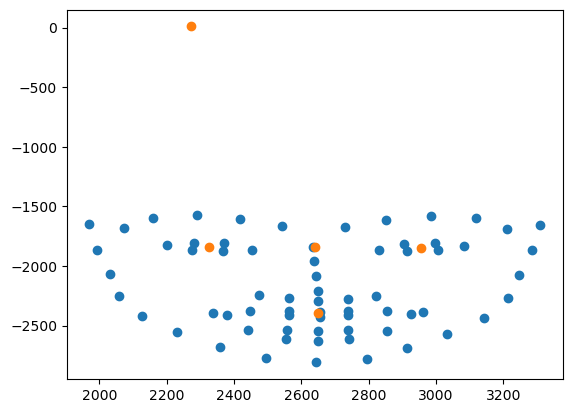

In [27]:
import matplotlib.pyplot as plt


core_pts = np.concatenate([eye_left.reshape(1,2),eye_right.reshape(1,2),\
    mouth_avg.reshape(1,2),eye_avg.reshape(1,2),x.reshape(1,2)],0)

plt.scatter(lm[:,0],-lm[:,-1])


plt.scatter(core_pts[:,0], -core_pts[:,1])

In [23]:
eye_to_mouth,np.flipud(eye_to_mouth)

(array([  9.66666667, 550.33333333]), array([550.33333333,   9.66666667]))

In [1]:
tri_path ='/home/nas4_user/jaeseonglee/ICCV2023/eg3d/eg3d/triplane_sample.npy'
import numpy as np
triplane = np.load(tri_path)

(256, 256)


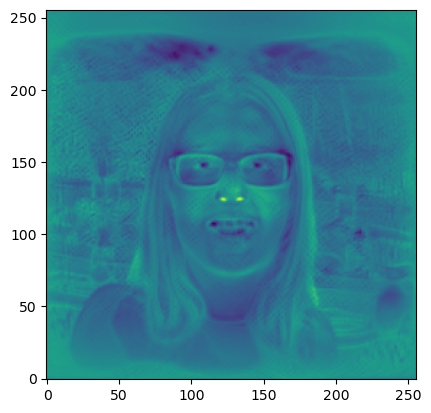

In [39]:
one = triplane.squeeze(0)[0].sum(0)
one = (one-one.min())/(one.max()-one.min())
import matplotlib.pyplot as plt
print(one.shape)
plt.imshow(one,origin='lower')